# 14 & 16 Nov 23 - Using the FFT with Real Data

Y'all have learned the main process for using an FFT on a 1D signal, so let's use it in the context of some real world data. We'll give you different kind of data that you can choose to work with: Transit light curve data and audio signals. Take a look at both datasets and start working on whichever one you'd like first.


## Transit Data

You work in a lab that is observing light curves to determine if there are transiting objects near a star and, if so, what is their period. Using the brightness of the star itself, we can determine it's mass and then it's a quick analysis to get the mass of the transiting objects (Thanks, Newton!).

In this activity, you have three data files that describe the CCD voltage on a sensor as a function of time. The observations were taken over a 48 hour period. You will need to read in the data, determine the sampling frequency, and then develop an FFT model to look into the frequency components.

<img src="https://images.newscientist.com/wp-content/uploads/2019/09/26122246/c0471894-rejuvenated_gas_giant_planet_illustration-spl.jpg" width=600px>

### Data Files

* [Observation 1](https://raw.githubusercontent.com/dannycab/phy415msu/main/MMIPbook/assets/data/FFT/obs1.csv)
* [Observation 2](https://raw.githubusercontent.com/dannycab/phy415msu/main/MMIPbook/assets/data/FFT/obs2.csv)
* [Observation 3](https://raw.githubusercontent.com/dannycab/phy415msu/main/MMIPbook/assets/data/FFT/obs3.csv)

The first data file is known to contain data from the observation of 2 transiting objects. Your lab mate misnamed the other two files, so it's not clear if they are the same set of observations or not.

Start with observation 1. You can use `pd.read` from the pandas library to read in the data.

**&#9989; Questions to answer**

For observation 1,

1. What does the FFT look like? Can you describe where the real observavtions might be in the plot?
2. Can you clean the noise from the data to find the real signal?
3. Can you estimate the transit times for the objects?

For observations 2 and 3,

1. Which one (or both or neither) observations are those of observation 1?
2. If there's a file with new observations, can you learn the same things as above?

In [1]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, ifft
import numpy as np
import IPython.display as ipd
from PIL import Image
import pandas as pd

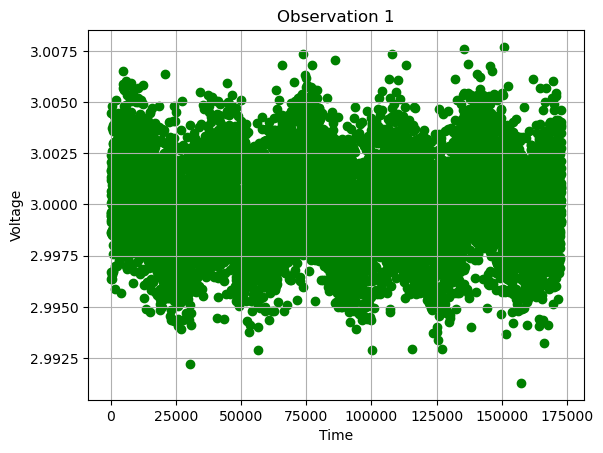

In [2]:
# Read in the data for Observation 1
Observation_1 = pd.read_csv("https://raw.githubusercontent.com/dannycab/phy415msu/main/MMIPbook/assets/data/FFT/obs1.csv")

# Access the Time and Voltage columns
Time = Observation_1.iloc[:, 0]
Voltage = Observation_1.iloc[:, 1]

# Create a scatter plot
plt.scatter(Time, Voltage, marker='o', color='green')
plt.title('Observation 1')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.grid(True)
plt.show()

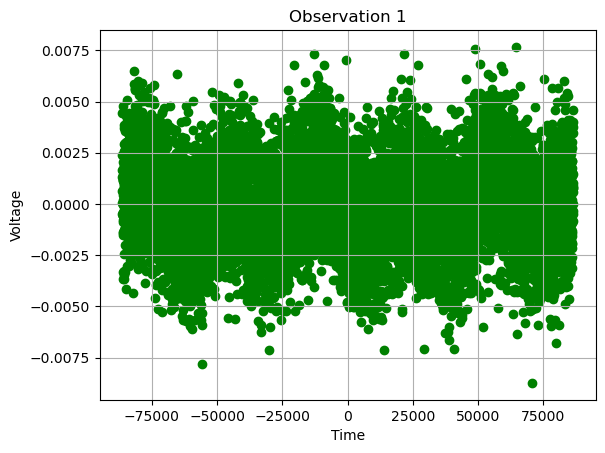

In [3]:
# Access the Time and Voltage columns
new_time = Time - np.average(Time)
new_voltage = Voltage - np.average(Voltage)

# Create a scatter plot
plt.scatter(new_time, new_voltage, marker='o', color='green')
plt.title('Observation 1')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.grid(True)
plt.show()

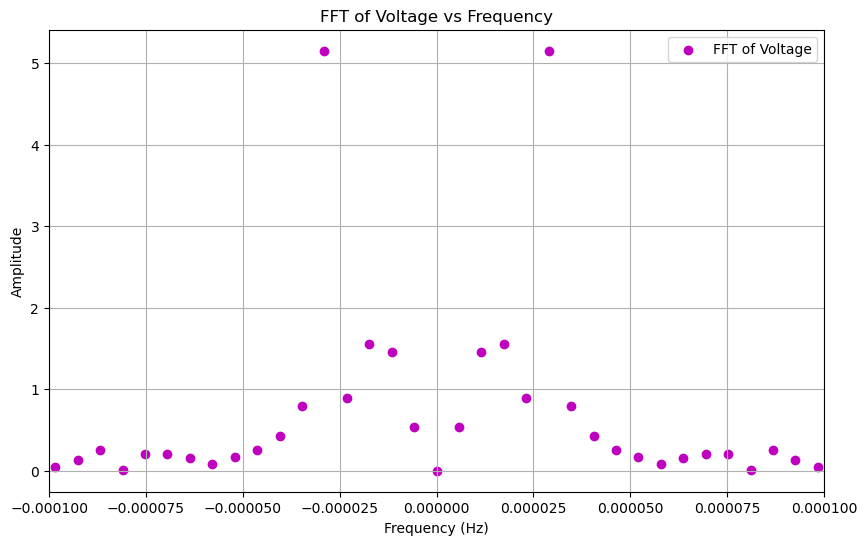

In [4]:
from numpy.fft import fft, fftfreq

fft_time = fft(new_time) #averaged time
fft_voltage = fft(new_voltage) #averaged voltage

# Calculate the frequency values
sampling_rate = 1.0 / (Time[1] - Time[0])  # Assuming a regular time sampling
freq = fftfreq(len(Time), 1.0 /sampling_rate)

# Plot the FFT results
plt.figure(figsize=(10, 6))
plt.scatter(freq, (np.abs(fft_voltage)), label='FFT of Voltage', color='m')

plt.title('FFT of Voltage vs Frequency')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(-0.0001, 0.0001)
#plt.ylim(0.4,3.0)
plt.legend()
plt.grid(True)
plt.show()

C:\Users\cesay\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


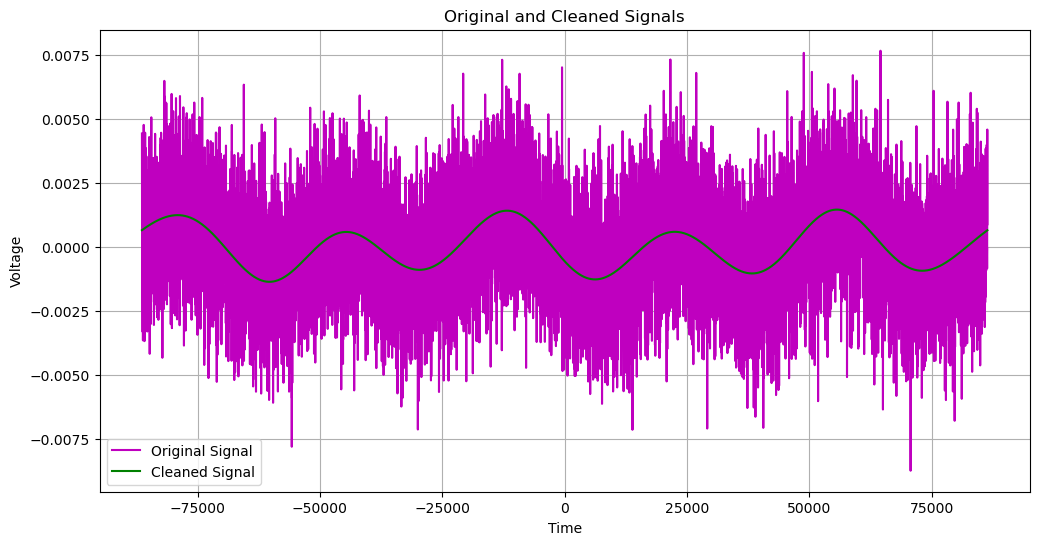

In [5]:
# Calculate the frequency values
sampling_rate = 1.0 / (Time[1] - Time[0])  # Assuming a regular time sampling
freq = fftfreq(len(Time), 1.0 /sampling_rate)

# Apply the low-pass filter
cutoff_frequency = 0.00005
low_pass_filter = np.abs(freq) < cutoff_frequency

# Filter the FFT result
cleaned_fft_result = fft_voltage * low_pass_filter

# Inverse FFT to obtain the cleaned signal
cleaned_signal = ifft(cleaned_fft_result)

# Apply the inverse FFT to obtain the cleaned signal in the time domain
cleaned_signal = ifft(cleaned_fft_result)

# Plot the original and cleaned signals
plt.figure(figsize=(12, 6))

# Plot the original signal
plt.plot(new_time, new_voltage, label='Original Signal', color='m')

# Plot the cleaned signal
plt.plot(new_time, cleaned_signal, label='Cleaned Signal', color='green')

plt.title('Original and Cleaned Signals')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.legend()
plt.grid(True)
plt.show()

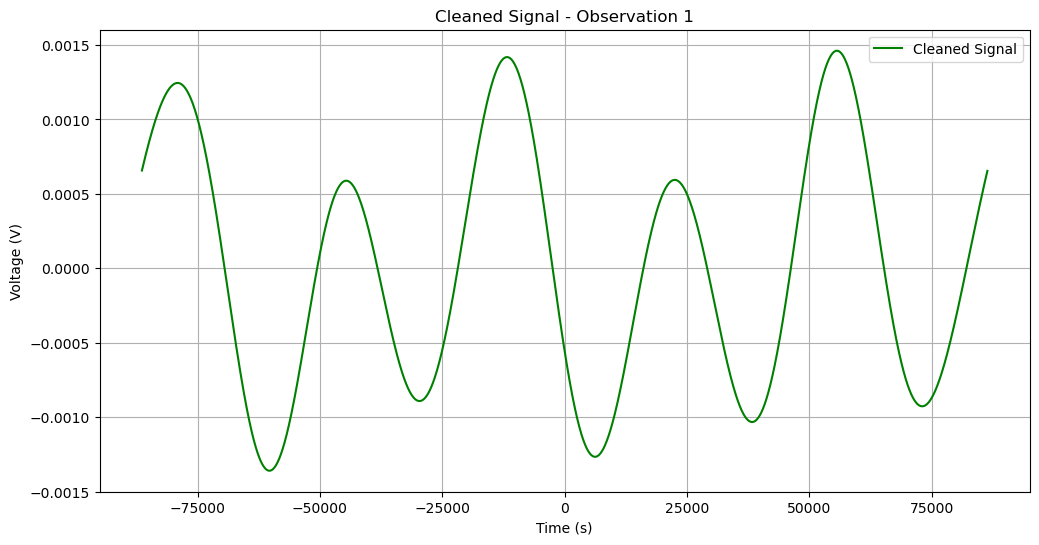

In [6]:
# Plot the cleaned signal only
plt.figure(figsize=(12, 6))
plt.plot(new_time, cleaned_signal, label='Cleaned Signal', color='green')
plt.title('Cleaned Signal - Observation 1')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Find the index corresponding to the maximum amplitude in the FFT
max_amplitude_index = np.argmax(np.abs(cleaned_fft_result))

# Extract the corresponding frequency and calculate the period
max_frequency = freq[max_amplitude_index]
period = 1.0 / max_frequency

print("Period of the wave:", period, "seconds")

Period of the wave: 34560.0 seconds


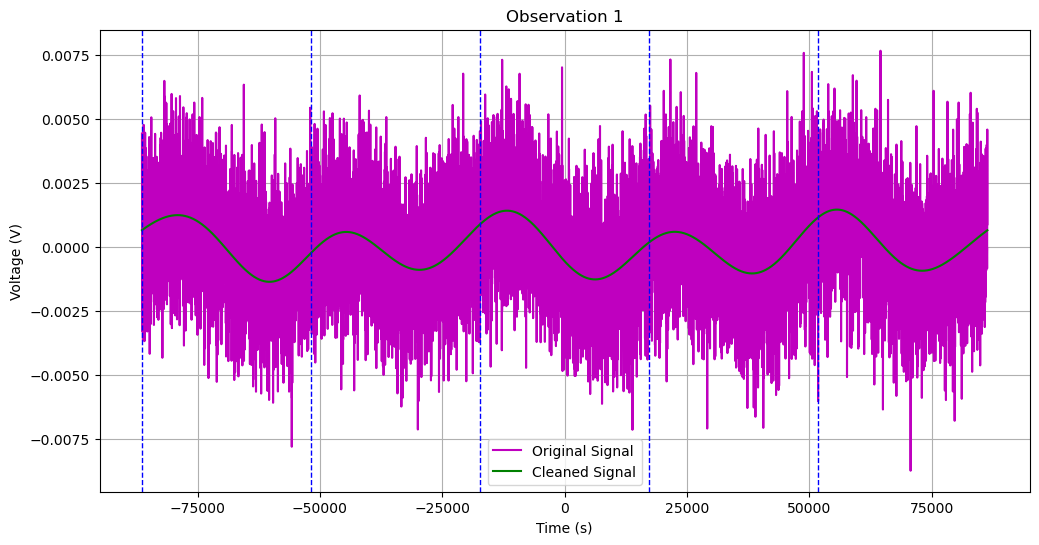

In [8]:
# Period of the wave
period = 34560.0

# Plot the cleaned signal only
plt.figure(figsize=(12, 6))
plt.plot(new_time, new_voltage, label='Original Signal', color='m')
plt.plot(new_time, cleaned_signal, label='Cleaned Signal', color='green')

# Add vertical lines at each period
for i in np.arange(new_time.min(), new_time.max(), period):
    plt.axvline(i, color='b', linestyle='--', linewidth=1, alpha=1)

plt.title('Observation 1')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid(True)
plt.show()


### Where the period of the wave is 34560.0 seconds.

## Audio Signals & Effects

A lot of audio processing boils down to taking the FFT of some audio signal, doing something to that frequency spectrum, the using the inverse FFT to get a new signal back with some effects on it. Here's some musical data to practice this:

Data:

 - Signal 1: [a single note played on a guitar](https://raw.githubusercontent.com/valentine-alia/phy415fall23/main/content/assets/note.wav)
 - Signal 2: [a chord played on a guitar](https://raw.githubusercontent.com/valentine-alia/phy415fall23/main/content/assets/chord.wav)
 - Signal 3: [metal riff without distortion](https://raw.githubusercontent.com/valentine-alia/phy415fall23/main/content/assets/riff.wav)
 - Signal 4: [a full track](https://raw.githubusercontent.com/valentine-alia/phy415fall23/main/content/assets/track.wav)

For some code to help you read-in and listen to the audio, refer to [yesterday's notes](https://dannycaballero.info/phy415fall23/content/3_waves/notes-Using-FFTs.html)

**&#9989; Questions to answer**

For signal 1:

1. What does the fourier transform of the signal look like? Does it have a lot of peaks?
2. What note is being played?

For signal 2:

1. What chord is being played (i.e. what are the individual notes?)
2. After taking the FFT of the data, try to get rid of the frequency components of the highest note in the chord then take the IFFT to see what the new signal sounds like. What do you notice?
3. Repeat 2. but for the lowest note.

For signal 3:

1. Without distortion, this metal riff sounds... kindof lame to be honest. Try adding distortion to the signal.

For signal 4:

1. Oftentimes in audio enginnering its useful to use an "equalizer" to boost or lessen certain frequencies in an audio signal to give it a different sound. Try cutting out all the frequencies above some threshold and see what it sounds like then. 
2. Try to isolate the synth bass from the rest of the signal. Is it possible to get a perfect separation?
3. At the begging of the track, you can hear that there is some effect on the guitars. Can you use the FFT to figure out what this effect is doing?

# SIGNAL 1

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import IPython.display as ipd
import requests
from io import BytesIO

In [10]:
# Load the WAV file from the URL
url = 'https://raw.githubusercontent.com/valentine-alia/phy415fall23/main/content/assets/note.wav'
response = requests.get(url)
wav_data = BytesIO(response.content)
sample_rate, data = wavfile.read(wav_data)

# If the audio has multiple channels, take the mean
if len(data.shape) > 1:
    data = data.mean(axis=1)

# Display the audio using IPython.display
ipd.Audio(data, rate=sample_rate)

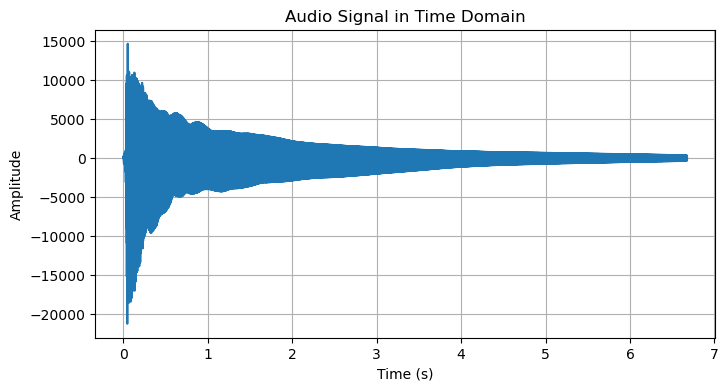

In [11]:
# Get the number of samples
num_samples = data.shape[0]

# Create a time array/scale
time = np.linspace(0, num_samples/sample_rate, num=num_samples)

# Plot the signal in the time domain
plt.figure(figsize=(8, 4))
plt.plot(time, data)  # Plot the first 1000 samples
plt.title('Audio Signal in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()

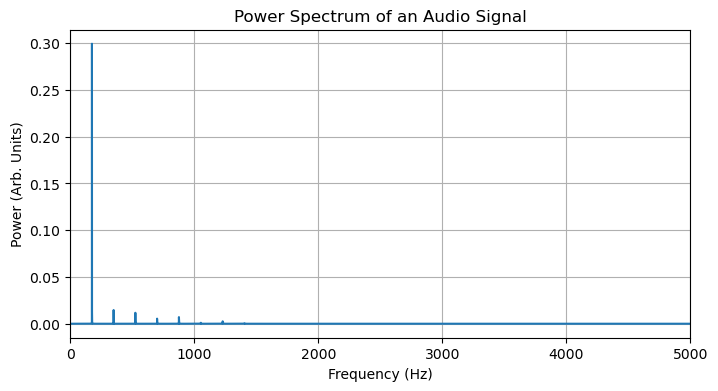

In [12]:
# Calculate the two-sided power spectrum
data_fft = fft(data)
power_spectrum = np.abs(data_fft)**2
freqs = np.fft.fftfreq(len(data_fft), 1/sample_rate)

# Convert to a one-sided power spectrum by taking the first half and doubling it
one_sided_power_spectrum = power_spectrum[:num_samples//2] * 2 / np.sum(power_spectrum)
one_sided_power_spectrum[0] /= 2  # Do not double the DC component

# Plot the normalized one-sided power spectrum
plt.figure(figsize=(8, 4))
plt.plot(freqs[:num_samples//2], one_sided_power_spectrum)
plt.xlim(0, 5000)
plt.title('Power Spectrum of an Audio Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (Arb. Units)')
plt.grid()

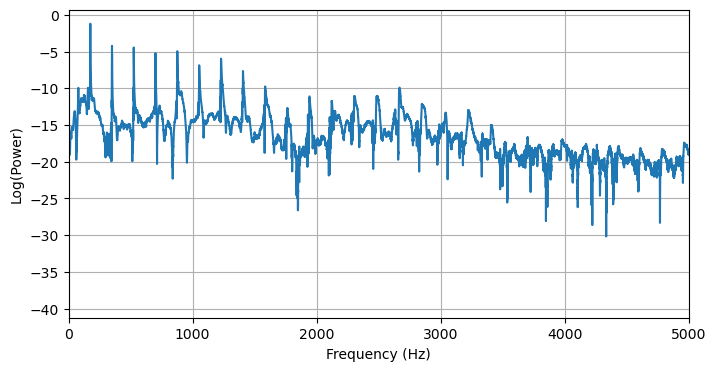

In [13]:
#finding the peaks
plt.figure(figsize=(8, 4))
plt.plot(freqs[:num_samples//2], np.log(one_sided_power_spectrum))
plt.xlim(0, 5000)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Log(Power)')
plt.grid()

Peak Frequencies: [174.80147274]


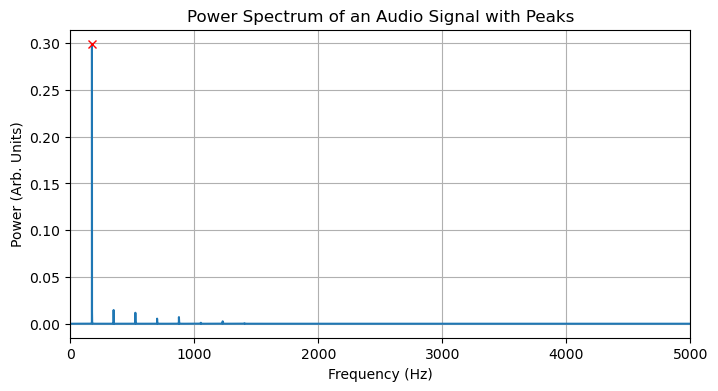

In [14]:
# Find peaks in the one-sided power spectrum
from scipy.signal import find_peaks
peaks, _ = find_peaks(one_sided_power_spectrum, height=0.1, distance=100)

# Plot the power spectrum with identified peaks
plt.figure(figsize=(8, 4))
plt.plot(freqs[:num_samples//2], one_sided_power_spectrum)
plt.plot(freqs[:num_samples//2][peaks], one_sided_power_spectrum[peaks], 'x', color='red')
plt.xlim(0, 5000)
plt.title('Power Spectrum of an Audio Signal with Peaks')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (Arb. Units)')
plt.grid()

# Print the frequencies corresponding to the peaks
peak_frequencies = freqs[peaks]
print("Peak Frequencies:", peak_frequencies)

In [15]:
def frequency_to_note(frequency):
    A4_frequency = 440.0
    notes = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
    # Calculate the note index
    note_index = round(12 * np.log2(frequency / A4_frequency))
    # Calculate the note name
    note_name = notes[note_index % 12]
    # Calculate the octave
    octave = 4 + note_index // 12
    return f"{note_name}{octave}"

for peak_frequency in peak_frequencies:
    note = frequency_to_note(peak_frequency)
    print(f"Frequency: {peak_frequency} Hz, Note: {note}")

Frequency: 174.80147273604197 Hz, Note: G#2


# SIGNAL 2

In [16]:
# Load the WAV file from the URL
url = 'https://raw.githubusercontent.com/valentine-alia/phy415fall23/main/content/assets/chord.wav'
response = requests.get(url)
wav_data = BytesIO(response.content)
sample_rate, data = wavfile.read(wav_data)

# If the audio has multiple channels, take the mean
if len(data.shape) > 1:
    data = data.mean(axis=1)

# Display the audio using IPython.display
ipd.Audio(data, rate=sample_rate)

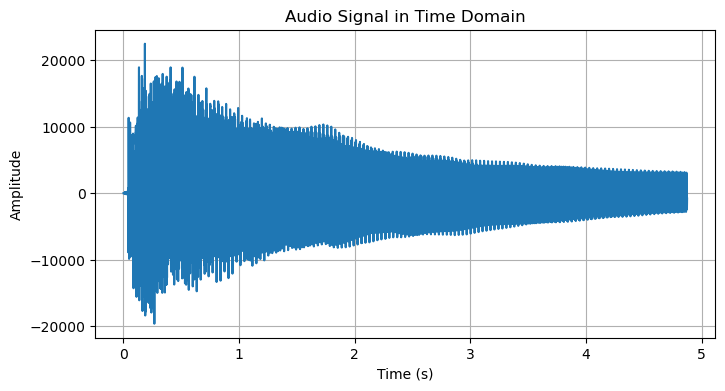

In [17]:
# Get the number of samples
num_samples = data.shape[0]

# Create a time array/scale
time = np.linspace(0, num_samples/sample_rate, num=num_samples)

# Plot the signal in the time domain
plt.figure(figsize=(8, 4))
plt.plot(time, data)  # Plot the first 1000 samples
plt.title('Audio Signal in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()

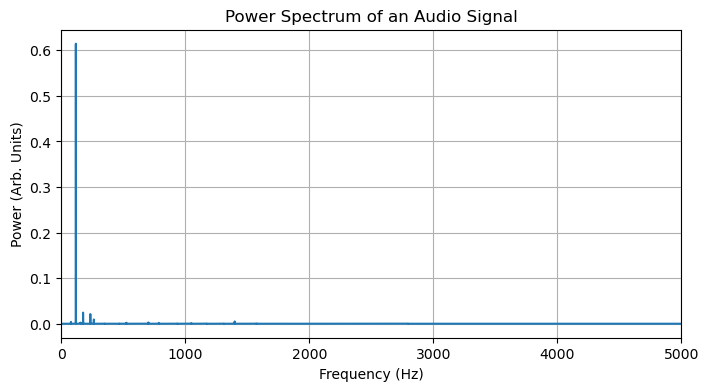

In [18]:
# Calculate the two-sided power spectrum
data_fft = fft(data)
power_spectrum = np.abs(data_fft)**2

freqs = np.fft.fftfreq(len(data_fft), 1/sample_rate)

# Convert to a one-sided power spectrum by taking the first half and doubling it
one_sided_power_spectrum = power_spectrum[:num_samples//2] * 2 / np.sum(power_spectrum)
one_sided_power_spectrum[0] /= 2  # Do not double the DC component

# Plot the normalized one-sided power spectrum
plt.figure(figsize=(8, 4))

plt.plot(freqs[:num_samples//2], one_sided_power_spectrum)
plt.xlim(0, 5000)

plt.title('Power Spectrum of an Audio Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (Arb. Units)')

plt.grid()

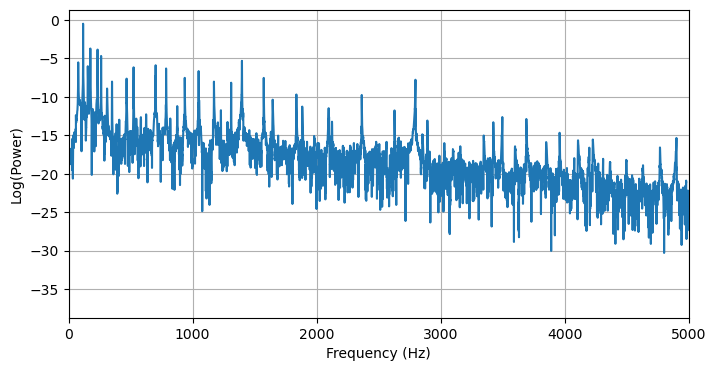

In [19]:
#finding the peaks
plt.figure(figsize=(8, 4))
plt.plot(freqs[:num_samples//2], np.log(one_sided_power_spectrum))
plt.xlim(0, 5000)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Log(Power)')
plt.grid()

In [20]:
peaks, _ = find_peaks(one_sided_power_spectrum, height=0.1, distance=100)

# Map peak frequencies to notes
def frequency_to_note(frequency):
    A4_frequency = 440.0
    notes = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
    # Calculate the note index
    note_index = round(12 * np.log2(frequency / A4_frequency))
    # Calculate the note name
    note_name = notes[note_index % 12]
    # Calculate the octave
    octave = 4 + note_index // 12
    return f"{note_name}{octave}"

# Print the detected notes for each peak frequency
for peak_frequency in freqs[peaks]:
    note = frequency_to_note(peak_frequency)
    print(f"Frequency: {peak_frequency} Hz, Note: {note}")

Frequency: 116.51254953764862 Hz, Note: C#2


In [32]:
# Calculate the two-sided power spectrum
data_fft = fft(data)
power_spectrum = np.abs(data_fft)**2

freqs = np.fft.fftfreq(len(data_fft), 1/sample_rate)

# Convert to a one-sided power spectrum by taking the first half and doubling it
one_sided_power_spectrum = power_spectrum[:len(data)//2] * 2 / np.sum(power_spectrum)
one_sided_power_spectrum[0] /= 2  # Do not double the DC component

# Find the index of the highest peak
highest_peak_index = np.argmax(one_sided_power_spectrum)

# Zero out the frequency component of the highest note
data_fft[highest_peak_index] = 0

# Perform the inverse FFT
new_data = ifft(data_fft).real

# Display the modified audio using IPython.display
ipd.Audio(new_data, rate=sample_rate)

print("Frequency of Highest Peak:", freqs[highest_peak_index])


Frequency of Highest Peak: 116.51254953764862


In [24]:
# Calculate the two-sided power spectrum
data_fft = fft(data)
power_spectrum = np.abs(data_fft)**2

freqs = np.fft.fftfreq(len(data_fft), 1/sample_rate)

# Convert to a one-sided power spectrum by taking the first half and doubling it
one_sided_power_spectrum = power_spectrum[:len(data)//2] * 2 / np.sum(power_spectrum)
one_sided_power_spectrum[0] /= 2  # Do not double the DC component

# Find the index of the lowest peak
lowest_peak_index = np.argmin(one_sided_power_spectrum)

# Zero out the frequency component of the lowest note
data_fft[lowest_peak_index] = 0

# Perform the inverse FFT
new_data = ifft(data_fft).real

# Display the modified audio using IPython.display
ipd.Audio(new_data, rate=sample_rate)
